<a href="https://colab.research.google.com/github/Jayani/CE888-Assignment-1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries

from keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 227x227x3: 227x227 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(227, 227, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 225, 225, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 64)        0   

In [ ]:
# Data Preprocessing

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Fire-vs-NoFire/Training'
test_path = '/content/drive/MyDrive/Colab Notebooks/Fire-vs-NoFire/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train = train_datagen.flow_from_directory(
          train_path, # This is the source directory for training images
          target_size=(227,227), # All images will be resized to 227x227
          batch_size=32,   # Since we use binary_crossentropy loss, we need binary labels
          class_mode='binary',
          subset='training')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = train_datagen.flow_from_directory(
                train_path,   # This is the source directory for training images
                target_size=(227,227),  # All images will be resized to 227x227
                batch_size=32,
                class_mode='binary', 
                subset='validation')


Found 34977 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
train_image_names = glob.glob('/content/drive/MyDrive/Colab Notebooks/Fire-vs-NoFire/Training/*/*.jpg')
train_Fire_image_names = glob.glob('/content/drive/MyDrive/Colab Notebooks/Fire-vs-NoFire/Training/Fire/*.jpg')
train_noFire_image_names = glob.glob('/content/drive/MyDrive/Colab Notebooks/Fire-vs-NoFire/Training/No_Fire/*.jpg')

print("Total number of Training Images: ", len(train_image_names))
print("Number of Fire Images: ", len(train_Fire_image_names))
print("Number of No_Fire Images: ", len(train_noFire_image_names))

Total number of Training Images:  34977
Number of Fire Images:  20620
Number of No_Fire Images:  14357


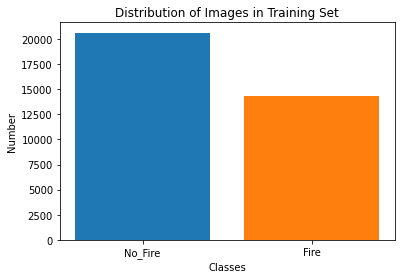

In [ ]:
plt.bar(os.listdir('/content/drive/MyDrive/Colab Notebooks/Fire-vs-NoFire/Training')[0], len(train_Fire_image_names))
plt.bar(os.listdir('/content/drive/MyDrive/Colab Notebooks/Fire-vs-NoFire/Training')[1], len(train_noFire_image_names))
plt.xlabel("Classes")
plt.ylabel("Number")
plt.title("Distribution of Images in Training Set")
plt.show()

In [ ]:
type(train)
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of First image : ",train[0][0][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32,)
Image Size of First image :  (227, 227, 3)


Text(0.5, 1.0, '0.0')

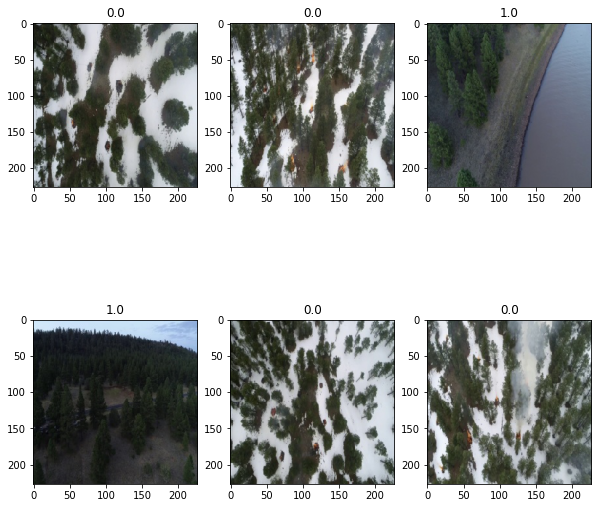

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][1])
axs[0][1].set_title(train[0][1][1])
axs[0][2].imshow(train[0][0][14])
axs[0][2].set_title(train[0][1][14])
axs[1][0].imshow(train[0][0][17])
axs[1][0].set_title(train[0][1][17])
axs[1][1].imshow(train[0][0][19])
axs[1][1].set_title(train[0][1][19])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])